# Verify Cuda is installed (Optional)
I installed CUDA for faster Neural Networks. The following two cells just checks to make sure that the GPU is working. This is optional. I have an RTX 2070, which is a CUDA enabled GPU. If you want to install CUDA go to this link.

https://medium.com/@cjanze/how-to-install-tensorflow-with-gpu-support-on-ubuntu-18-04-lts-with-cuda-10-nvidia-gpu-312a693744b5

In [1]:
from tensorflow.python.client import device_lib

In [2]:
values = device_lib.list_local_devices()
[x.name for x in values if x.device_type=='GPU']

['/device:GPU:0']

# Import all of the nessecary libraries

MatplotLib for plotting

numpy for numerical and array manipulation

Keras for Tensorflow/Thanos based Deep learning

In [3]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


# Digit Recognition
We are using MNIST dataset, This is more of a Computer Vision problem and Convolutional Nerual Networks (CNN) are typically used. But since this is an intro and predicting numbers can be done Multilayer perceptron we will.

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Set review
Let's review a sample of what the numbers look like.

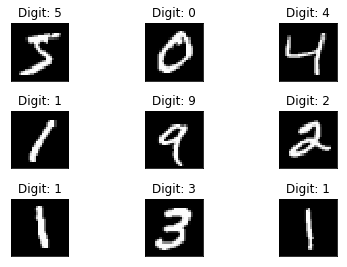

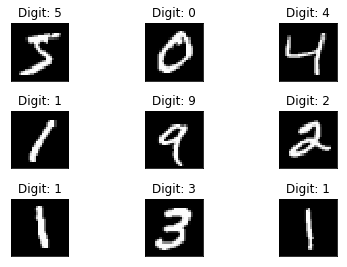

In [7]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

# Check the distribution of targets

<BarContainer object of 10 artists>

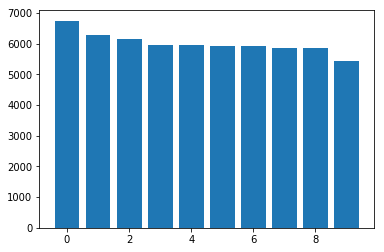

In [8]:
import seaborn as sns
import pandas as pd
plt.bar(list(set(y_train)),pd.Series(y_train).value_counts())

# Reformatting the data
Since A NN takes a (num_records, N_features)

And currently this data is (num_records,Picture_length,Picture_width)
We will need to reformat it to what we need it to be.

In [9]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [10]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [13]:
model = Sequential() #Create an empty Sequential model
model.add(Dense(512, input_shape=(784,))) #Create an input layer with 512 nodes and the input shape
model.add(Activation('relu')) #Adding Rectified Linear Units which is the standard activation function
model.add(Dropout(rate=0.2)) #Add drop out to help with overfitting

model.add(Dense(512)) #Adding a single hidden layer with 512 nodes
model.add(Activation('relu')) #Adding Rectified Linear Units which is the standard activation function
model.add(Dropout(rate=0.2)) #Add drop out to help with overfitting

model.add(Dense(10, activation='softmax')) #Adding output layer with 10, since that is the number of classes. 
#And we used softmax, since we want a probabilty distribution of the classes.

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total para

In [14]:
# compiling the sequential model
#We will use categorical crossentropy since we are trying to predict a single class
#We chose Adaptive Momentum as our optimizer as it is the go to optimizer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

W0624 19:28:42.287503 139778111371072 deprecation_wrapper.py:119] From /home/zander/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0624 19:28:42.331685 139778111371072 deprecation_wrapper.py:119] From /home/zander/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
# training the model and saving metrics in history
#We are setting verbose=2 to we can see each epoch. 
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

W0624 19:30:40.193675 139778111371072 deprecation.py:323] From /home/zander/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.2478 - acc: 0.9263 - val_loss: 0.1119 - val_acc: 0.9651
Epoch 2/20
 - 1s - loss: 0.1007 - acc: 0.9691 - val_loss: 0.0768 - val_acc: 0.9752
Epoch 3/20
 - 1s - loss: 0.0715 - acc: 0.9776 - val_loss: 0.0713 - val_acc: 0.9750
Epoch 4/20
 - 1s - loss: 0.0557 - acc: 0.9820 - val_loss: 0.0640 - val_acc: 0.9801
Epoch 5/20
 - 1s - loss: 0.0450 - acc: 0.9852 - val_loss: 0.0690 - val_acc: 0.9797
Epoch 6/20
 - 1s - loss: 0.0394 - acc: 0.9869 - val_loss: 0.0686 - val_acc: 0.9791
Epoch 7/20
 - 4s - loss: 0.0348 - acc: 0.9886 - val_loss: 0.0652 - val_acc: 0.9825
Epoch 8/20
 - 4s - loss: 0.0287 - acc: 0.9904 - val_loss: 0.0665 - val_acc: 0.9818
Epoch 9/20
 - 4s - loss: 0.0269 - acc: 0.9913 - val_loss: 0.0653 - val_acc: 0.9825
Epoch 10/20
 - 4s - loss: 0.0260 - acc: 0.9911 - val_loss: 0.0701 - val_acc: 0.9828
Epoch 11/20
 - 4s - loss: 0.0229 - acc: 0.9921 - val_loss: 0.0734 - val_acc: 0.9817
Epoch 12/20
 - 4s - loss: 0.0230 - 

# Evaluate our model
Now let's evaluate the model to see how we did

The first index is the loss, the second index is the accuracy

In [16]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 21us/step


[0.07698599499987495, 0.9835]